In [13]:
# Import all dependencies 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import datetime
from datetime import datetime

In [14]:
# load county data
counties = pd.read_csv('us-counties.csv')
counties.sample(5)

,date,county,state,fips,cases,deaths
314011,7/8/2020,Gallatin,Montana,30031.0,327,1
166800,5/22/2020,Marion,Georgia,13197.0,48,2
184072,5/27/2020,Fisher,Texas,48151.0,2,1
148515,5/16/2020,Bay,Florida,12005.0,83,3
574950,9/27/2020,Wright,Missouri,29229.0,352,0


In [4]:
states = pd.read_csv('us.csv')
states.sample(5)

,date,cases,deaths
128,5/28/2020,1730723,101622
137,6/6/2020,1934818,110032
186,7/25/2020,4190337,146313
287,11/3/2020,9469433,232607
81,4/11/2020,531106,23168


In [15]:
# find hennepin county
henn = counties[(counties['county']=='Hennepin') & (counties['state']=='Minnesota')]
henn.sample(3)

,date,county,state,fips,cases,deaths
291590,7/1/2020,Hennepin,Minnesota,27053.0,11892,776
500245,9/4/2020,Hennepin,Minnesota,27053.0,23798,888
704425,11/6/2020,Hennepin,Minnesota,27053.0,40559,1016


In [16]:
henn['datetime'] = pd.to_datetime(henn['date'])


In [17]:
henn.sort_values(by = 'datetime')
henn = henn.reset_index()
henn = henn.groupby(["datetime"]).sum()

# Sort by datetime and reset index
henn.sort_values(by = 'datetime')
henn = henn.reset_index()

# Finish datetime conversion
henn['datetime'] = pd.to_datetime(henn['datetime'])
henn['day'] = henn['datetime'].map(lambda x: x.day)
henn['month'] = henn['datetime'].map(lambda x: x.month)
henn['year'] = henn['datetime'].map(lambda x: x.year)

henn = henn.dropna()
henn = henn


In [7]:


    
henn['new_deaths'] = henn['new_deaths'].fillna(0)

KeyError: 'new_deaths'

In [18]:
henn['new_deaths'] = henn['deaths'].diff()

henn.tail()

,datetime,index,fips,cases,deaths,day,month,year,new_deaths
241,2020-11-08,710912,27053.0,42695,1023,8,11,2020,3.0
242,2020-11-09,714156,27053.0,43570,1023,9,11,2020,0.0
243,2020-11-10,717400,27053.0,44547,1025,10,11,2020,2.0
244,2020-11-11,720644,27053.0,45372,1030,11,11,2020,5.0
245,2020-11-12,723888,27053.0,46555,1033,12,11,2020,3.0


In [19]:
henn['new_deaths'] = henn['new_deaths'].fillna(0)
henn

,datetime,index,fips,cases,deaths,day,month,year,new_deaths
0,2020-03-12,1487,27053.0,1,0,12,3,2020,0.0
1,2020-03-13,1770,27053.0,3,0,13,3,2020,0.0
2,2020-03-14,2114,27053.0,6,0,14,3,2020,0.0
3,2020-03-15,2518,27053.0,12,0,15,3,2020,0.0
4,2020-03-16,2970,27053.0,26,0,16,3,2020,0.0
...,...,...,...,...,...,...,...,...,...
241,2020-11-08,710912,27053.0,42695,1023,8,11,2020,3.0
242,2020-11-09,714156,27053.0,43570,1023,9,11,2020,0.0
243,2020-11-10,717400,27053.0,44547,1025,10,11,2020,2.0
244,2020-11-11,720644,27053.0,45372,1030,11,11,2020,5.0


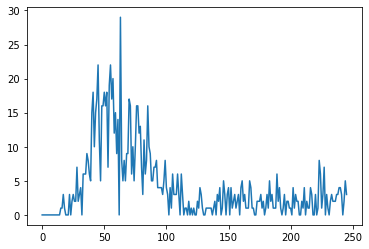

In [20]:
# plot new deaths
henn['new_deaths'].plot()

In [21]:
henn['adjust'] = henn['deaths'] * .8
henn

,datetime,index,fips,cases,deaths,day,month,year,new_deaths,adjust
0,2020-03-12,1487,27053.0,1,0,12,3,2020,0.0,0.0
1,2020-03-13,1770,27053.0,3,0,13,3,2020,0.0,0.0
2,2020-03-14,2114,27053.0,6,0,14,3,2020,0.0,0.0
3,2020-03-15,2518,27053.0,12,0,15,3,2020,0.0,0.0
4,2020-03-16,2970,27053.0,26,0,16,3,2020,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
241,2020-11-08,710912,27053.0,42695,1023,8,11,2020,3.0,818.4
242,2020-11-09,714156,27053.0,43570,1023,9,11,2020,0.0,818.4
243,2020-11-10,717400,27053.0,44547,1025,10,11,2020,2.0,820.0
244,2020-11-11,720644,27053.0,45372,1030,11,11,2020,5.0,824.0


In [23]:
def make_models():
    ''' function to run deaths model'''
    # Make the model
    Hen_model = LinearRegression()
    
    # Assign the features and the target
    X_Us = henn[["day", "month", "year"]]
    y_Us = henn[["deaths"]]
    
    # Split the data for training and testing
    X_train_Us, X_test_Us, y_train_Us, y_test_Us = train_test_split(X_Us, y_Us, random_state=42)
    
    # Fit the model with the training data and score it with the testing data
    Hen_model.fit(X_train_Us, y_train_Us)
    Hen_model.score(X_test_Us, y_test_Us)
    
    # Make Dataframe for the holidays which will be used for the predicitons:
    # Labor Day, Election Day, Thanksgiving, Christmas

    #election_day = {"day": [20], "month": [11], "year": [2020]}
    predict_weeks = {"day": [20, 27, 4, 11, 18, 25], "month": [11, 11, 12, 12, 12, 12], "year": [2020, 2020, 2020, 2020, 2020, 2020]}
    
    
    predict_weeks = pd.DataFrame(predict_weeks)
    #predict_election = pd.DataFrame(election_day)
    predict_weeks["datetime"] = pd.to_datetime((predict_weeks.year*10000 + predict_weeks.month*100+predict_weeks.day).apply(str),format='%Y%m%d')   


    # Predict with the model
    predictions = Hen_model.predict(predict_weeks[["day", "month", "year"]])


    # convert predictions from ndarray to list
    preds_arr = []
    for i in predictions:
        preds_arr.append(np.asscalar(i))
    
    # Add the precitions back to the DataFrame and convert from object to 
    # float so we can use it for graphing
    predict_weeks["predicted_deaths"] = predictions
    predict_weeks["predicted_deaths"] = predict_weeks['predicted_deaths'].astype('float')
    
    return predict_weeks

make_models()

,day,month,year,datetime,predicted_deaths
0,20,11,2020,2020-11-20,1240.821170
1,27,11,2020,2020-11-27,1275.771461
2,4,12,2020,2020-12-04,1299.694844
3,11,12,2020,2020-12-11,1334.645135
4,18,12,2020,2020-12-18,1369.595426
5,25,12,2020,2020-12-25,1404.545716


In [25]:
mn = make_models()
mn

,day,month,year,datetime,predicted_deaths
0,20,11,2020,2020-11-20,1240.821170
1,27,11,2020,2020-11-27,1275.771461
2,4,12,2020,2020-12-04,1299.694844
3,11,12,2020,2020-12-11,1334.645135
4,18,12,2020,2020-12-18,1369.595426
5,25,12,2020,2020-12-25,1404.545716


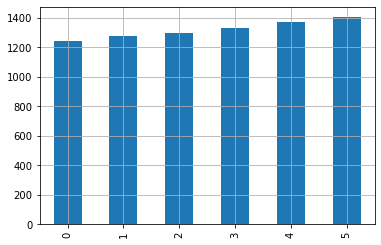

In [26]:
mn['predicted_deaths'].plot.bar()
plt.grid(True)

# PREDICTIONS

In [27]:
mn['adjust'] = mn['predicted_deaths'] * .9
mn

,day,month,year,datetime,predicted_deaths,adjust
0,20,11,2020,2020-11-20,1240.821170,1116.739053
1,27,11,2020,2020-11-27,1275.771461,1148.194315
2,4,12,2020,2020-12-04,1299.694844,1169.725360
3,11,12,2020,2020-12-11,1334.645135,1201.180621
4,18,12,2020,2020-12-18,1369.595426,1232.635883
5,25,12,2020,2020-12-25,1404.545716,1264.091145


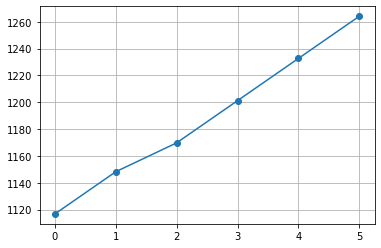

In [28]:
mn['adjust'].plot(marker='o')
plt.grid(True)

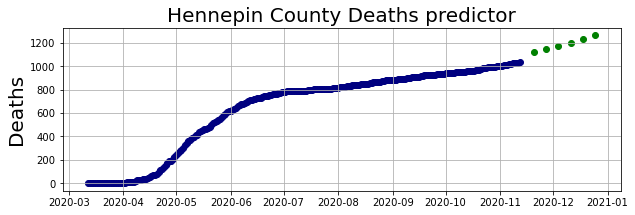

In [29]:
# Graph with Actual Values and Predicitons

plt.figure(figsize = (10, 3))
plt.scatter(mn['datetime'],mn['adjust'],c='g',)
plt.scatter(henn['datetime'],henn['deaths'],c='#000080',)
plt.grid(True)
plt.title('Hennepin County Deaths predictor', fontsize = 20)
plt.ylabel('Deaths', fontsize = 20)
plt.show()